In [7]:
import os

The following command resolve the problem of cloning the GitHub repo
Followed the [stackoverflow](https://stackoverflow.com/questions/70663523/the-unauthenticated-git-protocol-on-port-9418-is-no-longer-supported). People said **`Try using https://github.com instead of git://github.com`**. However, both command works!

### **Before move forward, we need to install three library through `notebook console`.**
> keras : `pip install keras`

> tensorflow: `pip install tensorflow`

> dlib: `pip install dlib`

Open console and intall it

In [8]:
# https://stackoverflow.com/questions/70663523/the-unauthenticated-git-protocol-on-port-9418-is-no-longer-supported
!git config --global url."https://".insteadOf git://

In [9]:
if not os.path.exists('pytorch_stylegan_encoder'):
    !git clone https://github.com/jacobhallberg/pytorch_stylegan_encoder.git
    %cd pytorch_stylegan_encoder
    !git submodule update --init --recursive
    !wget -q https://github.com/jacobhallberg/pytorch_stylegan_encoder/releases/download/v1.0/trained_models.zip
    !unzip trained_models.zip
    !rm trained_models.zip
    !pip install -qU torch_snippets
    !mv pytorch_stylegan_encoder/trained_models/stylegan_ffhq.pth pytorch_stylegan_encoder/InterFaceGAN/models/pretrain
else:
    %cd pytorch_stylegan_encoder

Cloning into 'pytorch_stylegan_encoder'...
remote: Enumerating objects: 358, done.
remote: Total 358 (delta 0), reused 0 (delta 0), pack-reused 358
Receiving objects: 100% (358/358), 56.88 MiB | 22.10 MiB/s, done.
Resolving deltas: 100% (185/185), done.
/notebooks/pytorch_stylegan_encoder
Submodule 'InterFaceGAN' (git://github.com/ShenYujun/InterFaceGAN.git) registered for path 'InterFaceGAN'
Cloning into '/notebooks/pytorch_stylegan_encoder/InterFaceGAN'...
Submodule path 'InterFaceGAN': checked out 'b707e942187f464251f855c92f7009b8cf13bf03'
Archive:  trained_models.zip
   creating: trained_models/
  inflating: trained_models/stylegan_ffhq.pth  
  inflating: trained_models/image_to_latent.pt  
mv: cannot stat 'pytorch_stylegan_encoder/trained_models/stylegan_ffhq.pth': No such file or directory


> I don't the following command is not working properly that our model should move into the `/InterFaceGAN/models/pretrain`

I putted manually that sucks!

In [4]:
# !mv pytorch_stylegan_encoder/trained_models/stylegan_ffhq.pth pytorch_stylegan_encoder/InterFaceGAN/models/pretrain

In [10]:
!pip install torch_snippets
from torch_snippets import *
from PIL import Image
import numpy as np 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


#### *Load the pre-trained generator and the synthesis network, mapping the network's weights*

In [11]:
from pytorch_stylegan_encoder.InterFaceGAN.models.stylegan_generator import StyleGANGenerator
from pytorch_stylegan_encoder.models.latent_optimizer import PostSynthesisProcessing

synthesizer = StyleGANGenerator("stylegan_ffhq").model.synthesis
mapper = StyleGANGenerator("stylegan_ffhq").model.mapping
trunc = StyleGANGenerator("stylegan_ffhq").model.truncation

[2022-03-27 09:36:43,614][INFO] Loading pytorch model from `InterFaceGAN/models/pretrain/stylegan_ffhq.pth`.
[2022-03-27 09:36:43,827][INFO] Successfully loaded!
[2022-03-27 09:36:43,828][INFO]   `lod` of the loaded model is 0.0.
[2022-03-27 09:37:55,109][INFO] Loading pytorch model from `InterFaceGAN/models/pretrain/stylegan_ffhq.pth`.
[2022-03-27 09:37:55,288][INFO] Successfully loaded!
[2022-03-27 09:37:55,290][INFO]   `lod` of the loaded model is 0.0.
[2022-03-27 09:37:55,683][INFO] Loading pytorch model from `InterFaceGAN/models/pretrain/stylegan_ffhq.pth`.
[2022-03-27 09:37:55,867][INFO] Successfully loaded!
[2022-03-27 09:37:55,869][INFO]   `lod` of the loaded model is 0.0.


#### *Define the function to generate an image from a random vector*

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [13]:
post_processing = PostSynthesisProcessing()
post_process = lambda image: post_processing(image).detach().cpu().numpy().astype(np.uint8)[0]

def latent2image(latent):
    img = post_process(synthesizer(latent))
    img = img.transpose(1,2,0)
    return img

### **Generate a random vector**

In [22]:
rand_latents = torch.randn(1, 512).to(device)

> In the preceding code, we are passing the random `1 x 512-dimensional
vector` through mapping and truncation networks to generate a vector that
is `1 x 18 x 512`. These `18 x 512` vectors are the ones that dictate the style of the
generated image.

### **Generate an image from the random vector**

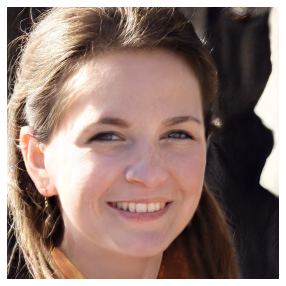

In [57]:
# rand_latents = torch.randn(1, 512).to(device)
show(latent2image(trunc(mapper(rand_latents))), sz=5)

In [58]:
latent2image(trunc(mapper(rand_latents))).shape

(1024, 1024, 3)

> So far, we have generated an random image. In the next few lines of code, you will
learn about performing style transfer between the preceding generated
image and an image of your choice.

*Fetch a custom image (MyImage.jpg) and align it. Alignment is important to generate proper latent vectors as all generated images in StyleGAN havethe face centered and features prominently visible*

In [59]:
# !wget https://www.dropbox.com/s/lpw10qawsc5ipbn/MyImage.JPG/ -O MyImage.jpg
# !git clone https://github.com/Puzer/stylegan-encoder.git
# !mkdir -p stylegan-encoder/raw_images
# !mkdir -p stylegan-encoder/aligned_images
# !mv MyImage.jpg stylegan-encoder/raw_images

--2022-03-27 09:40:01--  https://www.dropbox.com/s/lpw10qawsc5ipbn/MyImage.JPG/
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lpw10qawsc5ipbn/MyImage.JPG [following]
--2022-03-27 09:40:01--  https://www.dropbox.com/s/raw/lpw10qawsc5ipbn/MyImage.JPG
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc25c17e5b40d67dbbfc51178ef4.dl.dropboxusercontent.com/cd/0/inline/BiOY4NUuU2Tjo7tvRwja3YzsLLDxV_rqAV8VtcHp6BuuQGJUjXM5-iEa4i-laPVEd8oAUZjJWh-01pz0k5tN9aD37DB29NaRRKIchCnFgHSK04Pgs82M7AYos494MrRRLB1slKuTZaRcpi5fcOWRCNC29UD2MRHMq2XVQkCO5-L9JQ/file# [following]
--2022-03-27 09:40:01--  https://uc25c17e5b40d67dbbfc51178ef4.dl.dropboxusercontent.com/cd/0/inline/BiOY4NUuU2Tjo7tvRwja3YzsLLDxV_rqAV8VtcHp6BuuQGJUjXM5-iEa4i-laPVEd8oAUZ

### **Aling the custom images**

Before move forward, we need to install three library that we are using with PyTorch.
> keras : `pip install keras`

> tensorflow: `pip install tensorflow`

> dlib: `pip install dlib`

Open console and intall it

Use the aligned image to generate latents that can reproduce the aligned
image perfectly. This is a process of identifying the latent vector
combination that minimizes the difference between the aligned image and
the image generated from the latent vector:

In [108]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease                         
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Fetched 114 kB in 1s (174 kB/s)
Reading package lists... Done


In [109]:
!apt install -y libgl1-mesa-glx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-glx is already the newest version (21.2.6-0ubuntu0.1~20.04.2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [62]:
import cv2

In [71]:
!python stylegan-encoder/align_images.py stylegan-encoder/raw_images/ stylegan-encoder/aligned_images/
!mv stylegan-encoder/aligned_images/* MyImage.jpg

64053248/64040097 [==============================] - 4s 0us/step


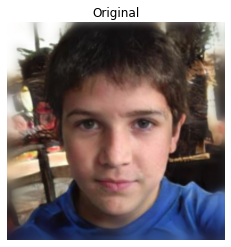

In [72]:
from PIL import Image
# img = Image.open('stylegan-encoder/raw_images/MyImage.jpg')
img = Image.open('MyImage.jpg')
show(np.array(img), sz=4, title='Original')

In [73]:
np.array(img).shape

(1024, 1024, 3)

In [86]:
!dir

InterFaceGAN  assets	       stylegan-encoder			  utilities
MyImage.jpg   encode_image.py  train_image_to_latent_model.ipynb
README.md     models	       trained_models


In [87]:
!python encode_image.py  stylegan-encoder/raw_images/MyImage.jpg\
    pred_dlatents_myImage.npy\
    --use_latent_finder true\
    --image_to_latent_path trained_models/image_to_latent.pt

Optimizing Latents.
[2022-03-27 10:07:37,213][INFO] Loading pytorch model from `InterFaceGAN/models/pretrain/stylegan_ffhq.pth`.
[2022-03-27 10:07:37,396][INFO] Successfully loaded!
[2022-03-27 10:07:37,396][INFO]   `lod` of the loaded model is 0.0.
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|████████████████████████████████████████| 528M/528M [00:23<00:00, 23.3MB/s]
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████████████████████████████████| 97.8M/97.8M [00:04<00:00, 23.7MB/s]
Step: 999, Loss: 3.3224387168884277: 100%|██| 1000/1000 [05:14<00:00,  3.18it/s]


This is the type of pred_latents after we generated from encoded_image.py: <class 'numpy.ndarray'>


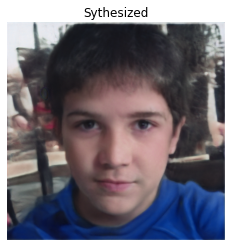

In [88]:
pred_dlatents = np.load('pred_dlatents_myImage.npy')
print('This is the type of pred_latents after we generated from encoded_image.py:', type(pred_dlatents))
pred_dlatent = torch.from_numpy(pred_dlatents).float().cuda()
pred_image = latent2image(pred_dlatent)
show(pred_image, sz=4, title='Sythesized')

In [89]:
pred_image.shape

(1024, 1024, 3)

The Python script `encode_image.py`, at a high level, does the following:
1. Creates a random vector in space.
2. Synthesizes an image with this vector.
3. Compares the synthesized image with the original input image using
VGG's perceptual loss (the same loss that was used in neural style
transfer).
4. Perform backpropagation on the random vector to reduce this loss
for a fixed number of iterations.
5. The optimized vector will now synthesize an image for which VGG
gives near-identical features as the input image, and hence the
synthesized image will look similar to the input image.

Now that we have the latent vectors that correspond to the image of
interest, let's perform style transfer between images

### Perform Style Transfer:
>As discussed, the core logic behind style transfer is actually the transfer of
parts of style tensors, that is, a subset of 18 of the 18 x 512 style tensors.
**Here, we will be transferring the first two rows (of the 18 x 512) in one case,
3-15 rows in one case, and 15-18 rows in one case**. Since each set of vectors is
responsible for generating different aspects of the image, each set of
swapped vectors swap different features in the image:

In [90]:
idxs_to_swap = slice(0,3)
my_latents = torch.Tensor(np.load('pred_dlatents_myImage.npy', allow_pickle=True))  # Style tensor (1, 18, 512)

A, B = latent2image(my_latents.cuda()), latent2image(trunc(mapper(rand_latents)))

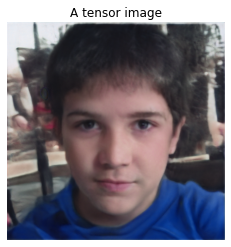

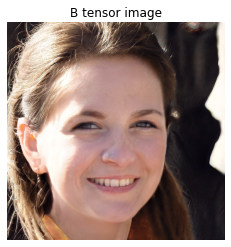

In [91]:
show(A, sz=4, title='A tensor image'), show(B, sz=4, title='B tensor image');

In [92]:
generated_image_latents = trunc(mapper(rand_latents))
generated_image_latents.shape

torch.Size([1, 18, 512])

In [93]:
x = my_latents.clone()
x[:, idxs_to_swap] = generated_image_latents[:, idxs_to_swap]
a = latent2image(x.float().cuda())

In [94]:
x = generated_image_latents.clone()
x[:, idxs_to_swap] = my_latents[:, idxs_to_swap]
b = latent2image(x.float().cuda())

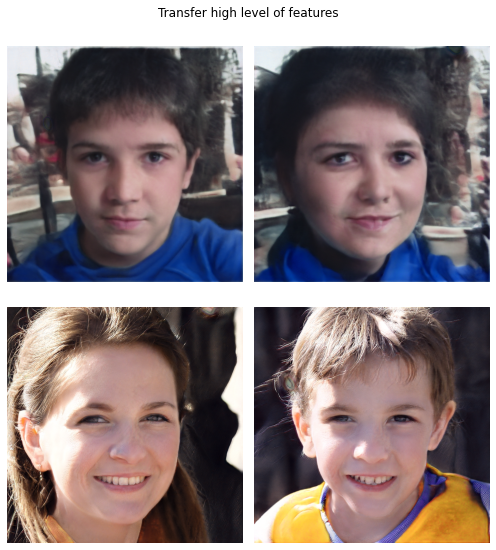

In [95]:
subplots([A, a, B, b], figsize=(7,8), nc=2, suptitle = 'Transfer high level of features')

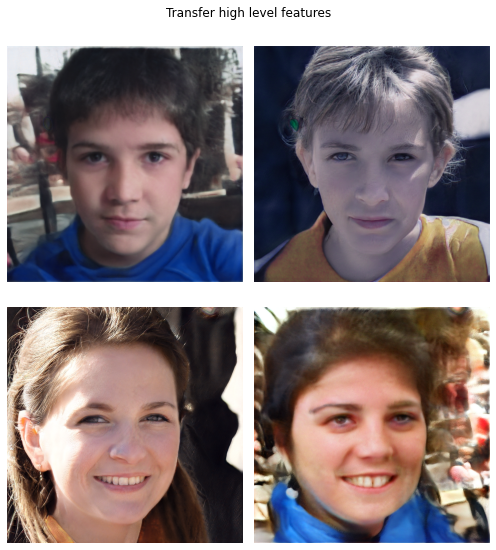

In [96]:
idxs_to_swap = slice(4,15)
my_latents = torch.Tensor(np.load('pred_dlatents_myImage.npy', allow_pickle=True))

A, B = latent2image(my_latents.cuda()), latent2image(trunc(mapper(rand_latents)))
generated_image_latents = trunc(mapper(rand_latents))

x = my_latents.clone()
x[:,idxs_to_swap] = generated_image_latents[:,idxs_to_swap]
a = latent2image(x.float().cuda())

x = generated_image_latents.clone()
x[:,idxs_to_swap] = my_latents[:,idxs_to_swap]
b = latent2image(x.float().cuda())

subplots([A,a,B,b], figsize=(7,8), nc=2, suptitle='Transfer high level features')

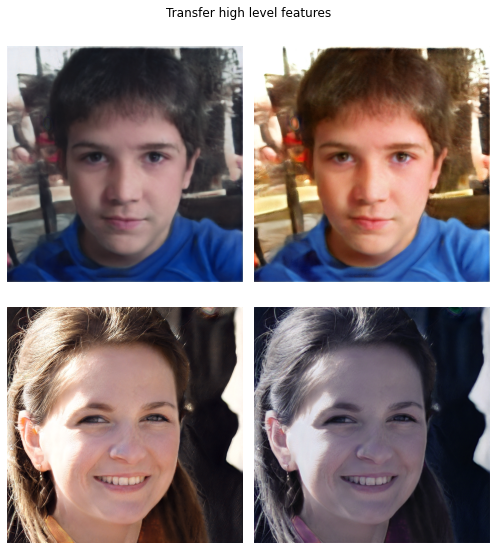

In [ ]:
idxs_to_swap = slice(15,18)
my_latents = torch.Tensor(np.load('pred_dlatents_myImage.npy', allow_pickle=True))

A, B = latent2image(my_latents.cuda()), latent2image(trunc(mapper(rand_latents)))
generated_image_latents = trunc(mapper(rand_latents))

x = my_latents.clone()
x[:,idxs_to_swap] = generated_image_latents[:,idxs_to_swap]
a = latent2image(x.float().cuda())

x = generated_image_latents.clone()
x[:,idxs_to_swap] = my_latents[:,idxs_to_swap]
b = latent2image(x.float().cuda())

subplots([A,a,B,b], figsize=(7,8), nc=2, suptitle='Transfer high level features')

Next, we extrapolate a style vector such that the new vectors will only
change the smileyness of our custom image. For this, you need to compute
the right direction to move the latent vector in. We can achieve this by
first creating a lot of fake images. An SVM classifier is then used to train
and find out if the persons within images are smiling or not. This SVM
hence creates a hyperplane that separates smiling from non-smiling faces.
The required direction to move is going to be normal to this hyperplane,
which is presented as stylegan_ffhq_smile_w_boundary.npy.
Implementation details can be found in the InterfaceGAN/edit.py code
itself:

In [98]:
# !python IterFaceGAN/edit.py -m stylegan_ffhq -o results_new_smile -b InterFaceGAN/boundaries/stylegan_ffhq_smile_w_boundary.npy

python: can't open file 'IterFaceGAN/edit.py': [Errno 2] No such file or directory


In [102]:
import glob

In [113]:
import cv2

In [111]:
torch.cuda.empty_cache()

In [ ]:
# If you get error read(im,1), then use matplotlib for this error
from matplotlib import pyplot as plt

Work directory `results_new_smile` has already existed!
Please specify another one.


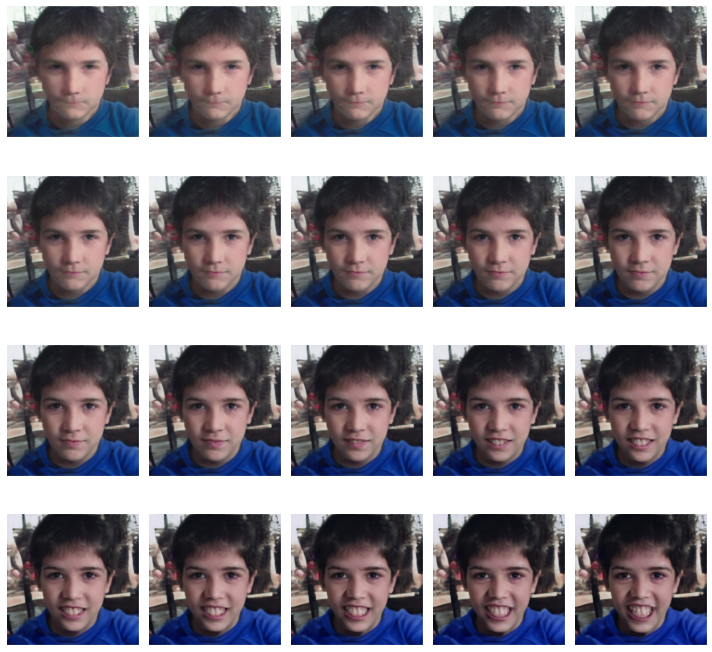

In [119]:
!python InterFaceGAN/edit.py\
 -m stylegan_ffhq\
 -o results_new_smile\
 -b InterFaceGAN/boundaries/stylegan_ffhq_smile_w_boundary.npy\
 -i pred_dlatents_myImage.npy\
 -s WP\
 --steps 20

generated_faces = glob.glob('results_new_smile/*.jpg')

subplots([plt.imread(im) for im in sorted(generated_faces)],figsize=(10,10))